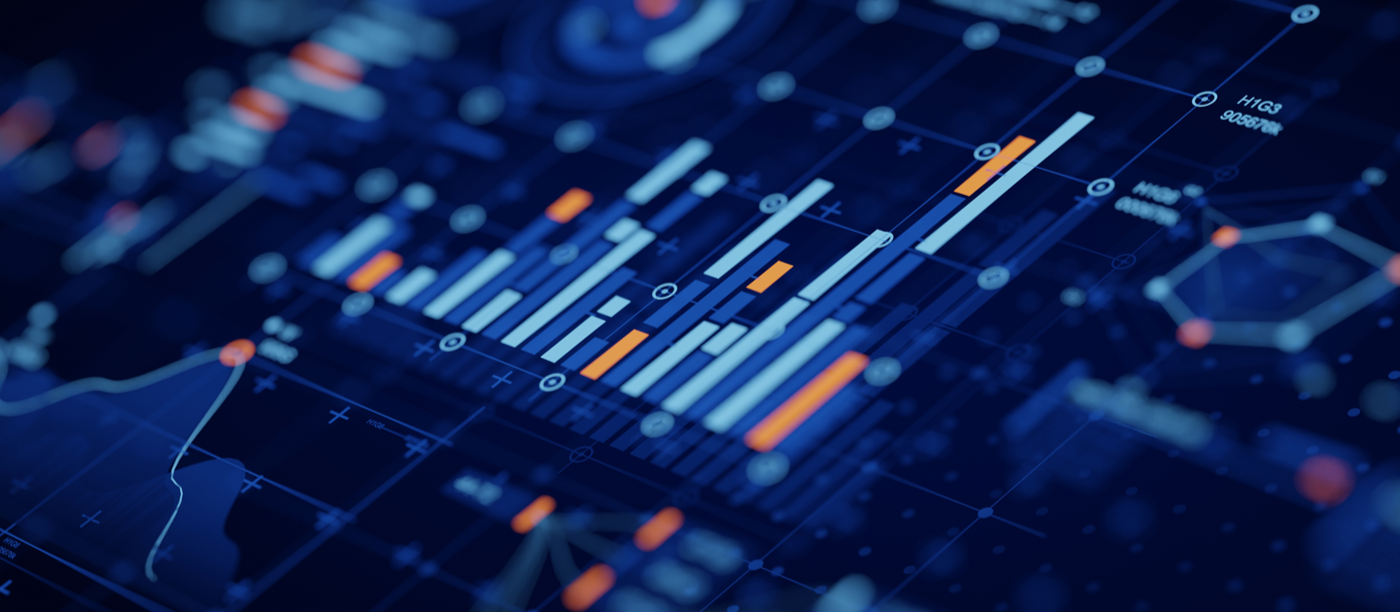

# Telco Customer Churn Analysis ML Project 


The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. 

**The data set includes information about**:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

**The goal of this project is to**:
- Check and clean data
- Conduct the exploratory data analysis to understand the behaviour of customers
- Build an ML model capable of accurately predicting the churn probability based of characteristics

In [281]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [272]:
df.describe().transpose()

count         mean          std    min       25%       50%  \
tenure          7032.0    32.421786    24.545260   1.00    9.0000    29.000   
MonthlyCharges  7032.0    64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475   

                      75%      max  
tenure            55.0000    72.00  
MonthlyCharges    89.8625   118.75  
TotalCharges    3794.7375  8684.80

# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

<AxesSubplot:xlabel='Churn', ylabel='count'>

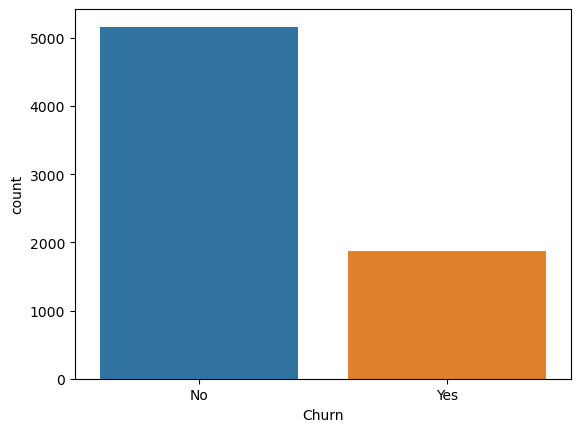

In [15]:
sns.countplot(data=df, x="Churn")

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

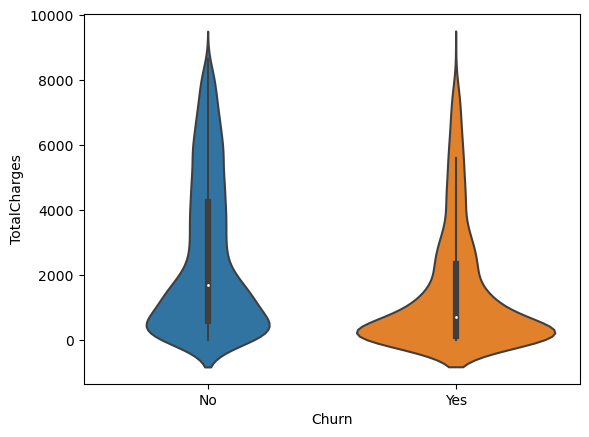

In [16]:
sns.violinplot(data=df, y="TotalCharges", x="Churn")

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

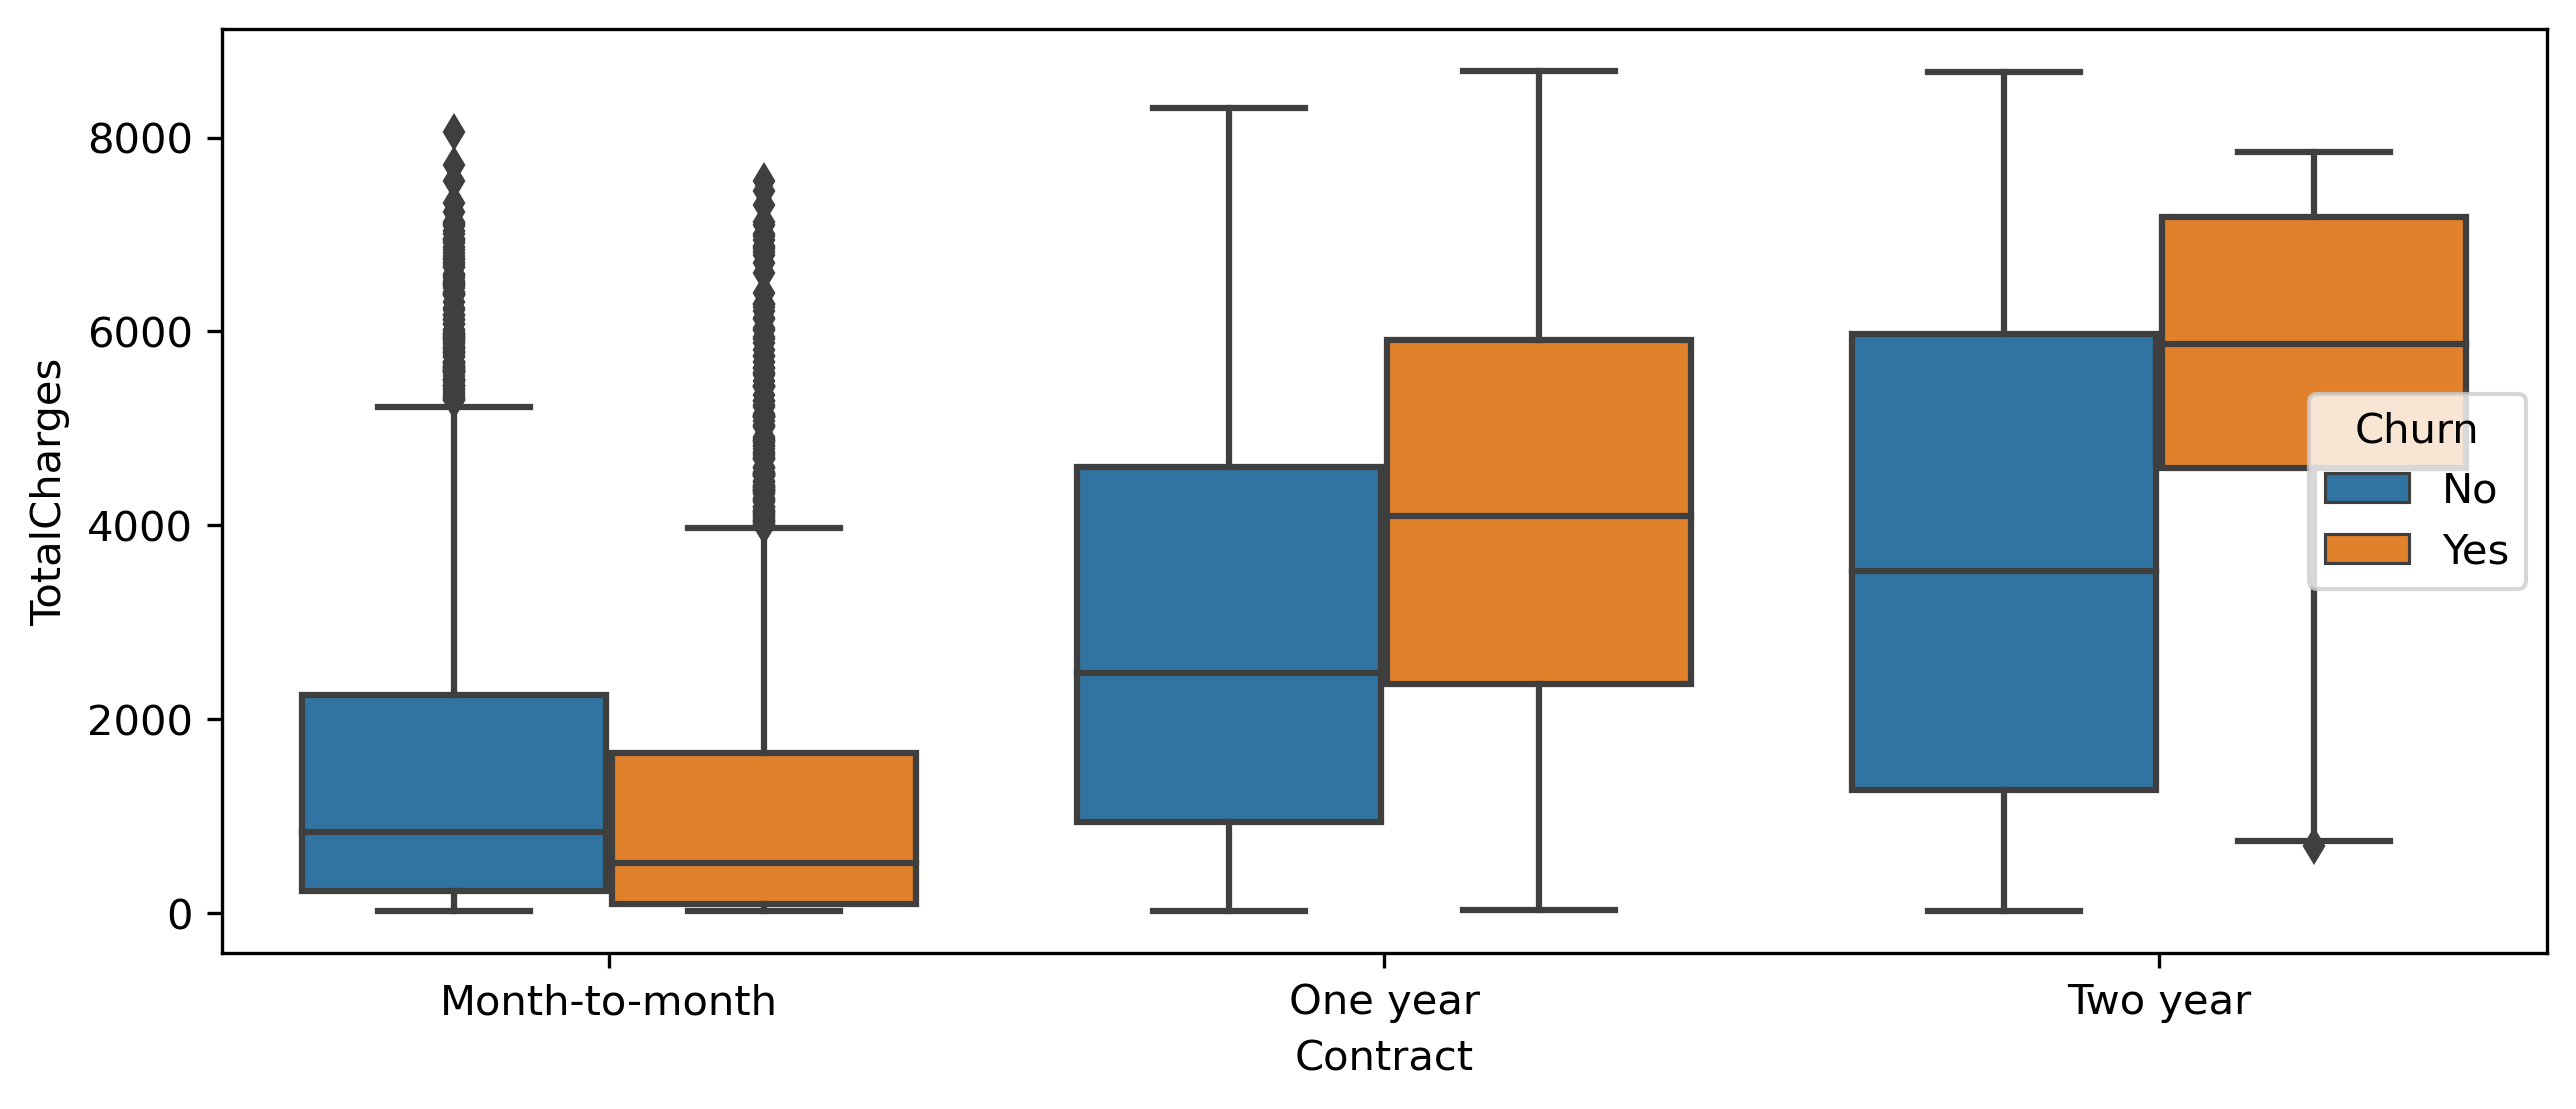

In [22]:
plt.figure(figsize=(10,4), dpi=300)
sns.boxplot(data=df, x="Contract", y="TotalCharges", hue="Churn")

**TASK: Create a bar plot showing the correlation of the following features to the class label.**

In [48]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [111]:
df["SeniorCitizen"]=df["SeniorCitizen"].astype("object")

In [112]:
cat_vars=df.select_dtypes(include="object").columns.tolist()

In [113]:
cat_vars.remove("customerID")

In [114]:
cat_vars

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [115]:
data_new=pd.get_dummies(df, columns=cat_vars, drop_first=True)

C:\Users\murad\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [116]:
len(data_new.columns)

32

In [117]:
data_new.columns

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [118]:
data_new.corr()["Churn_Yes"].sort_values().iloc[1:-1]

Contract_Two year                       -0.301552
OnlineBackup_No internet service        -0.227578
OnlineSecurity_No internet service      -0.227578
InternetService_No                      -0.227578
TechSupport_No internet service         -0.227578
StreamingMovies_No internet service     -0.227578
StreamingTV_No internet service         -0.227578
DeviceProtection_No internet service    -0.227578
TotalCharges                            -0.199484
Contract_One year                       -0.178225
OnlineSecurity_Yes                      -0.171270
TechSupport_Yes                         -0.164716
Dependents_Yes                          -0.163128
Partner_Yes                             -0.149982
PaymentMethod_Credit card (automatic)   -0.134687
PaymentMethod_Mailed check              -0.090773
OnlineBackup_Yes                        -0.082307
DeviceProtection_Yes                    -0.066193
MultipleLines_No phone service          -0.011691
gender_Male                             -0.008545


In [119]:
corr_data=pd.DataFrame(data_new.corr()["Churn_Yes"].sort_values().iloc[1:-1])

In [120]:
corr_data

Churn_Yes
Contract_Two year                      -0.301552
OnlineBackup_No internet service       -0.227578
OnlineSecurity_No internet service     -0.227578
InternetService_No                     -0.227578
TechSupport_No internet service        -0.227578
StreamingMovies_No internet service    -0.227578
StreamingTV_No internet service        -0.227578
DeviceProtection_No internet service   -0.227578
TotalCharges                           -0.199484
Contract_One year                      -0.178225
OnlineSecurity_Yes                     -0.171270
TechSupport_Yes                        -0.164716
Dependents_Yes                         -0.163128
Partner_Yes                            -0.149982
PaymentMethod_Credit card (automatic)  -0.134687
PaymentMethod_Mailed check             -0.090773
OnlineBackup_Yes                       -0.082307
DeviceProtection_Yes                   -0.066193
MultipleLines_No phone service         -0.011691
gender_Male                            -0.008545
PhoneService_Yes                        0.011691
MultipleLines_Yes                       0.040033
StreamingMovies_Yes                     0.060860
StreamingTV_Yes                         0.063254
SeniorCitizen_1                         0.150541
PaperlessBilling_Yes                    0.191454
MonthlyCharges                          0.192858
PaymentMethod_Electronic check          0.301455
InternetService_Fiber optic             0.307463

In [89]:
corr_data.index.tolist()

['Contract_Two year',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No internet service',
 'InternetService_No',
 'TechSupport_No internet service',
 'StreamingMovies_No internet service',
 'StreamingTV_No internet service',
 'DeviceProtection_No internet service',
 'TotalCharges',
 'Contract_One year',
 'OnlineSecurity_Yes',
 'TechSupport_Yes',
 'Dependents_Yes',
 'Partner_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Mailed check',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'MultipleLines_No phone service',
 'gender_Male',
 'PhoneService_Yes',
 'MultipleLines_Yes',
 'StreamingMovies_Yes',
 'StreamingTV_Yes',
 'SeniorCitizen_1',
 'PaperlessBilling_Yes',
 'MonthlyCharges',
 'PaymentMethod_Electronic check',
 'InternetService_Fiber optic']

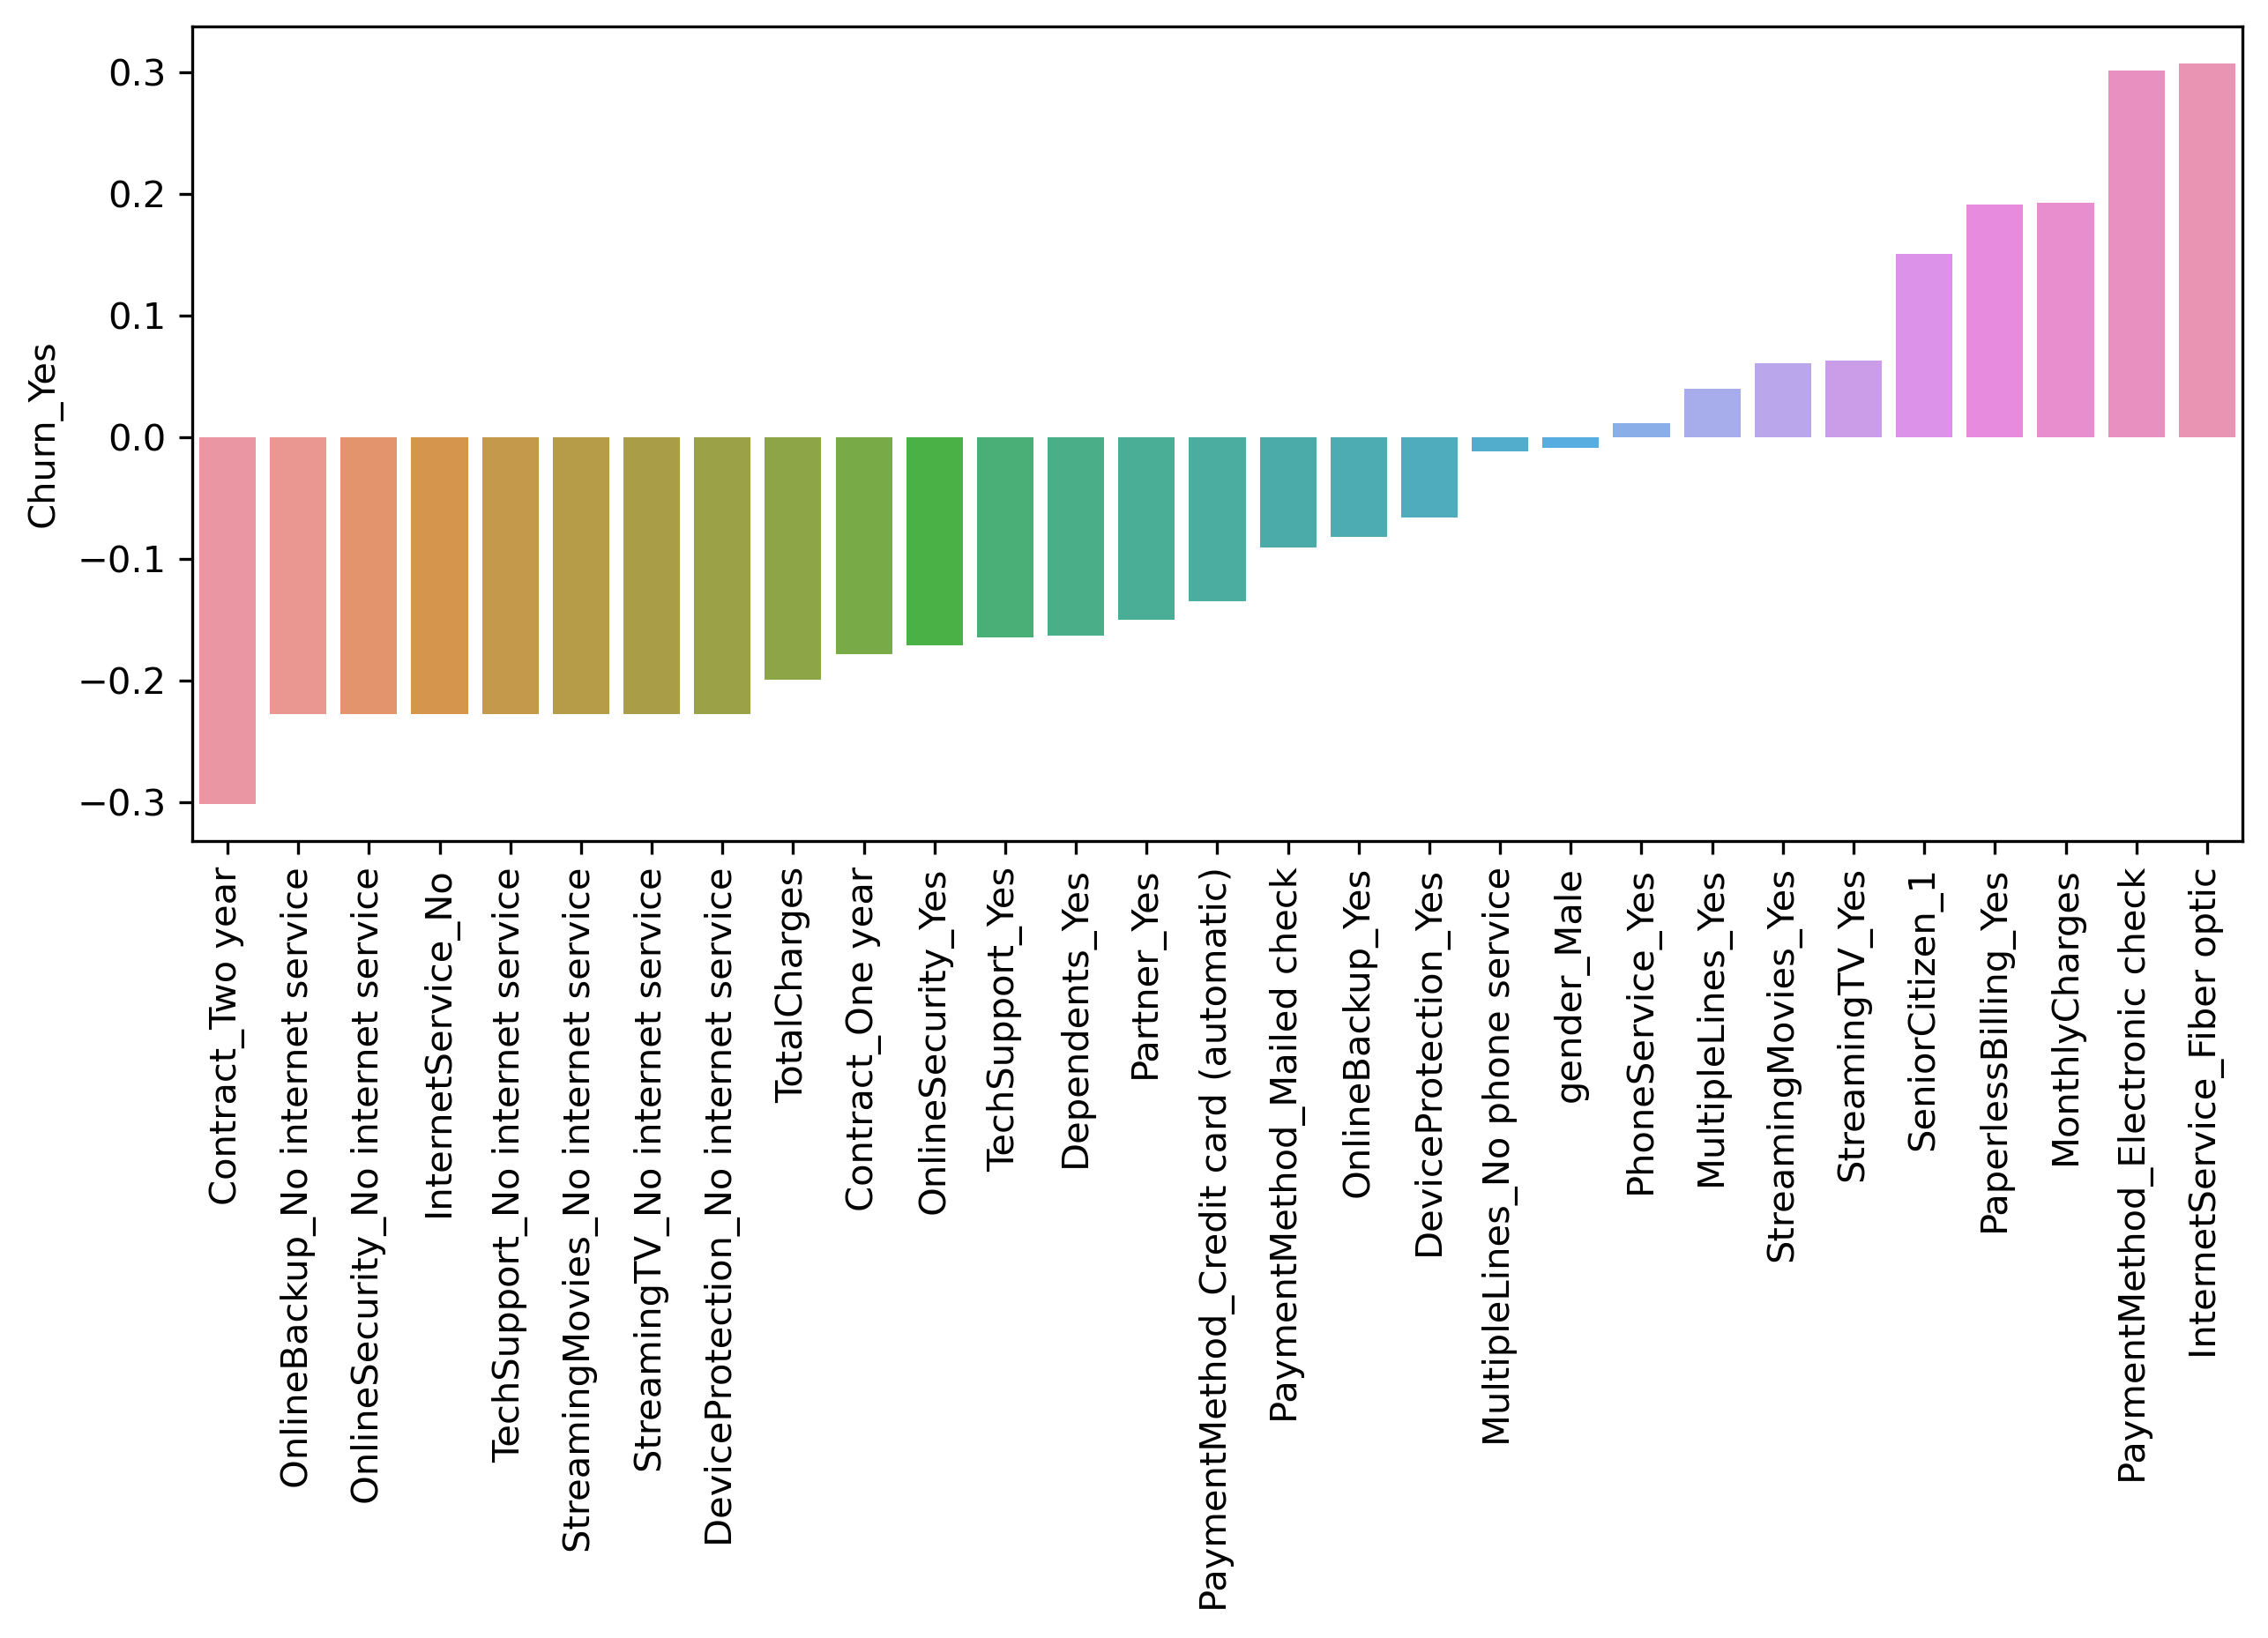

In [122]:
plt.figure(figsize=(10,4), dpi=300)
sns.barplot(x=corr_data.index, y=corr_data["Churn_Yes"])
plt.xticks(rotation=90);

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [123]:
pd.unique(df["Contract"])

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

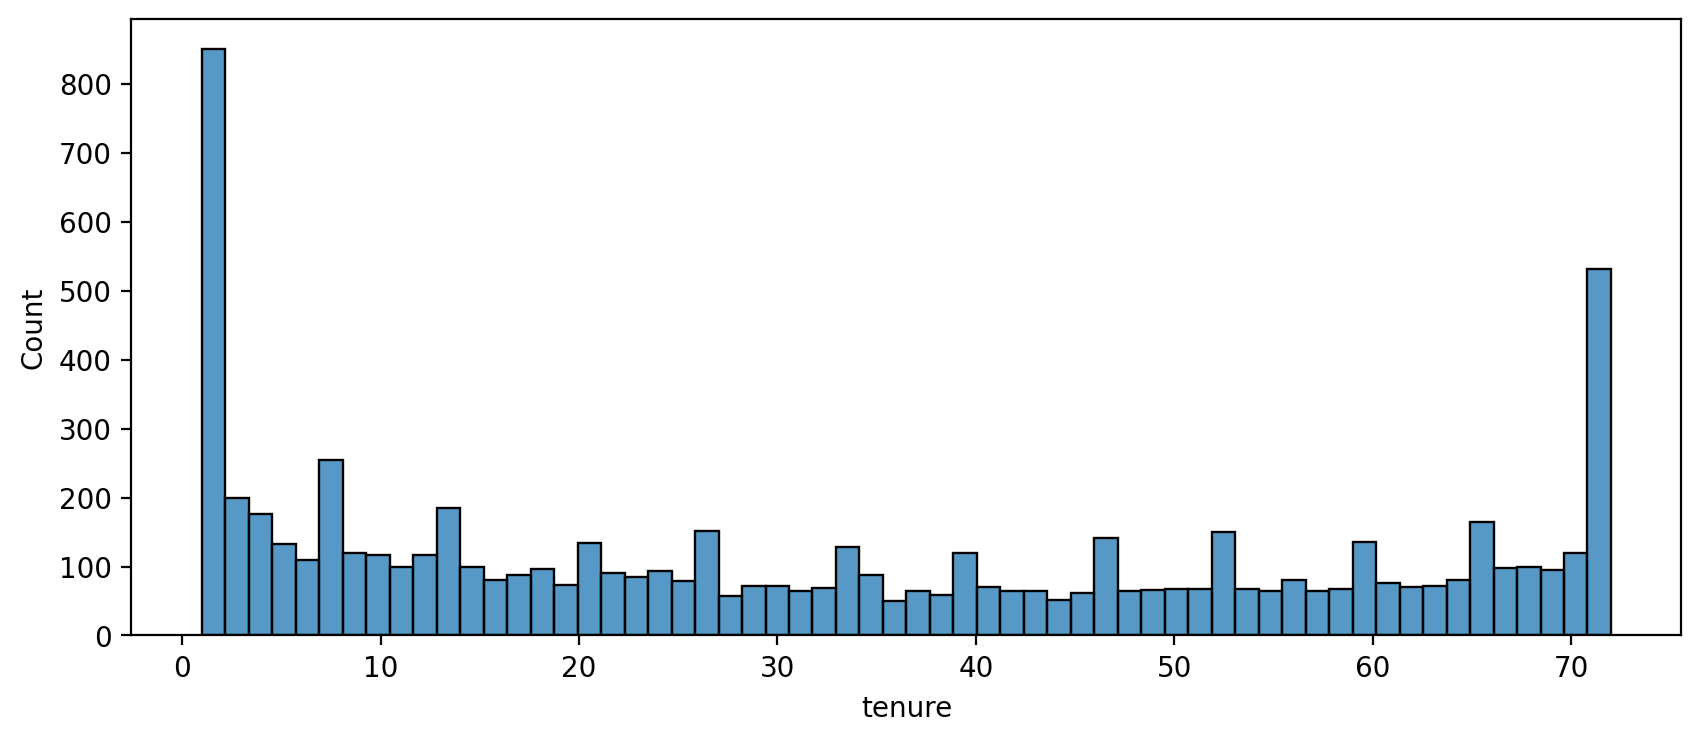

In [271]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=df, x="tenure", bins=60);

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

<Figure size 2000x600 with 0 Axes>

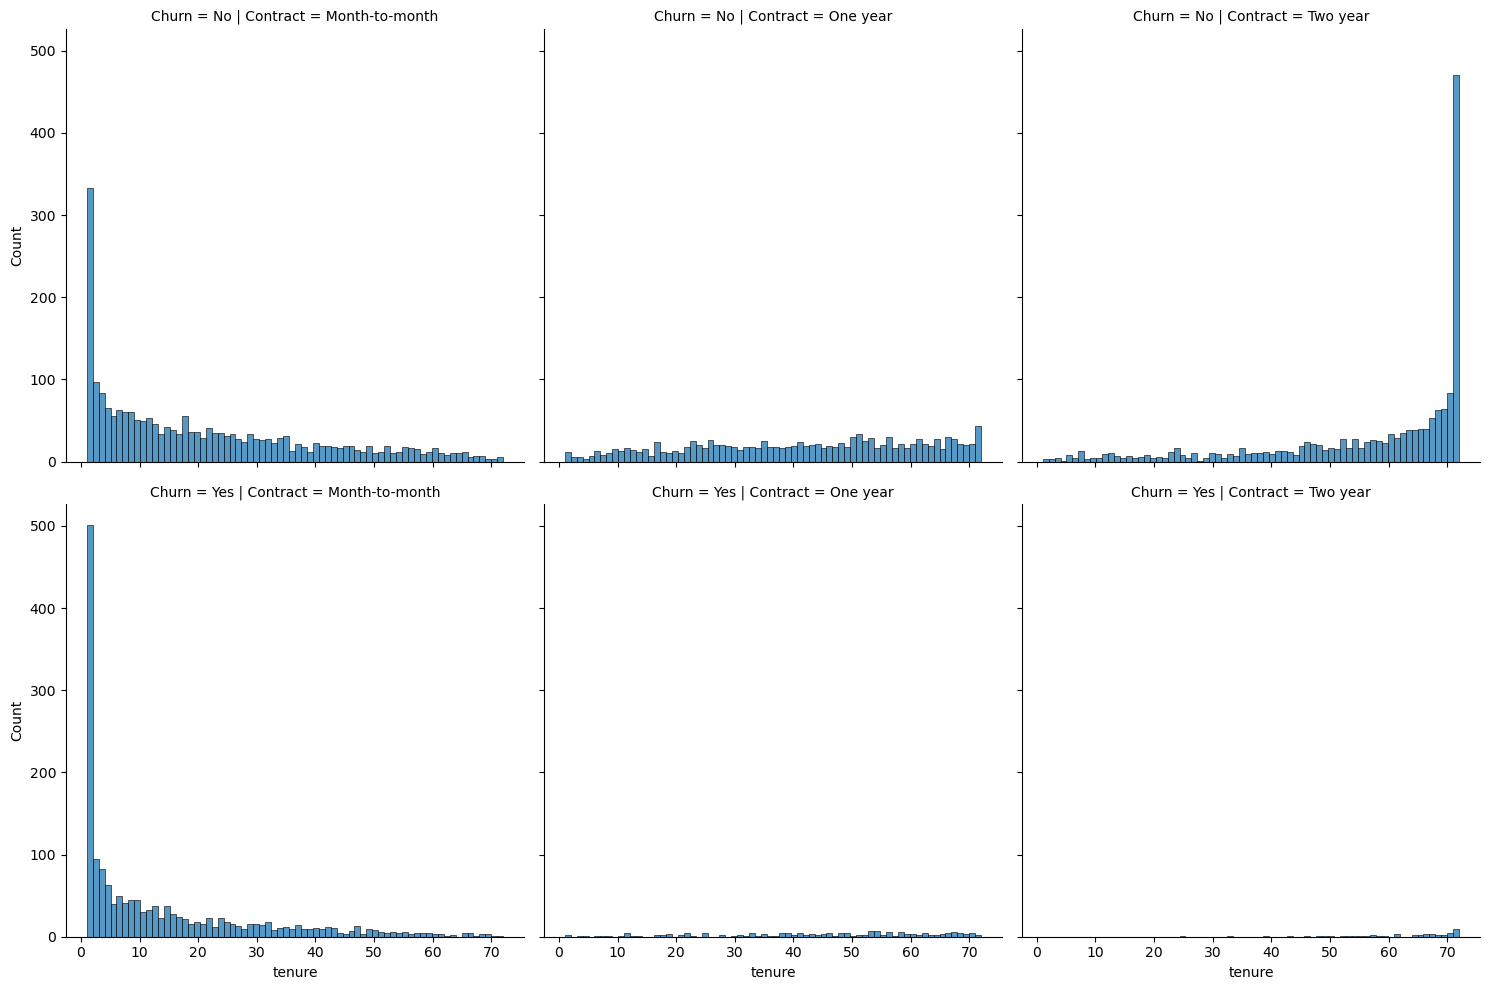

In [132]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

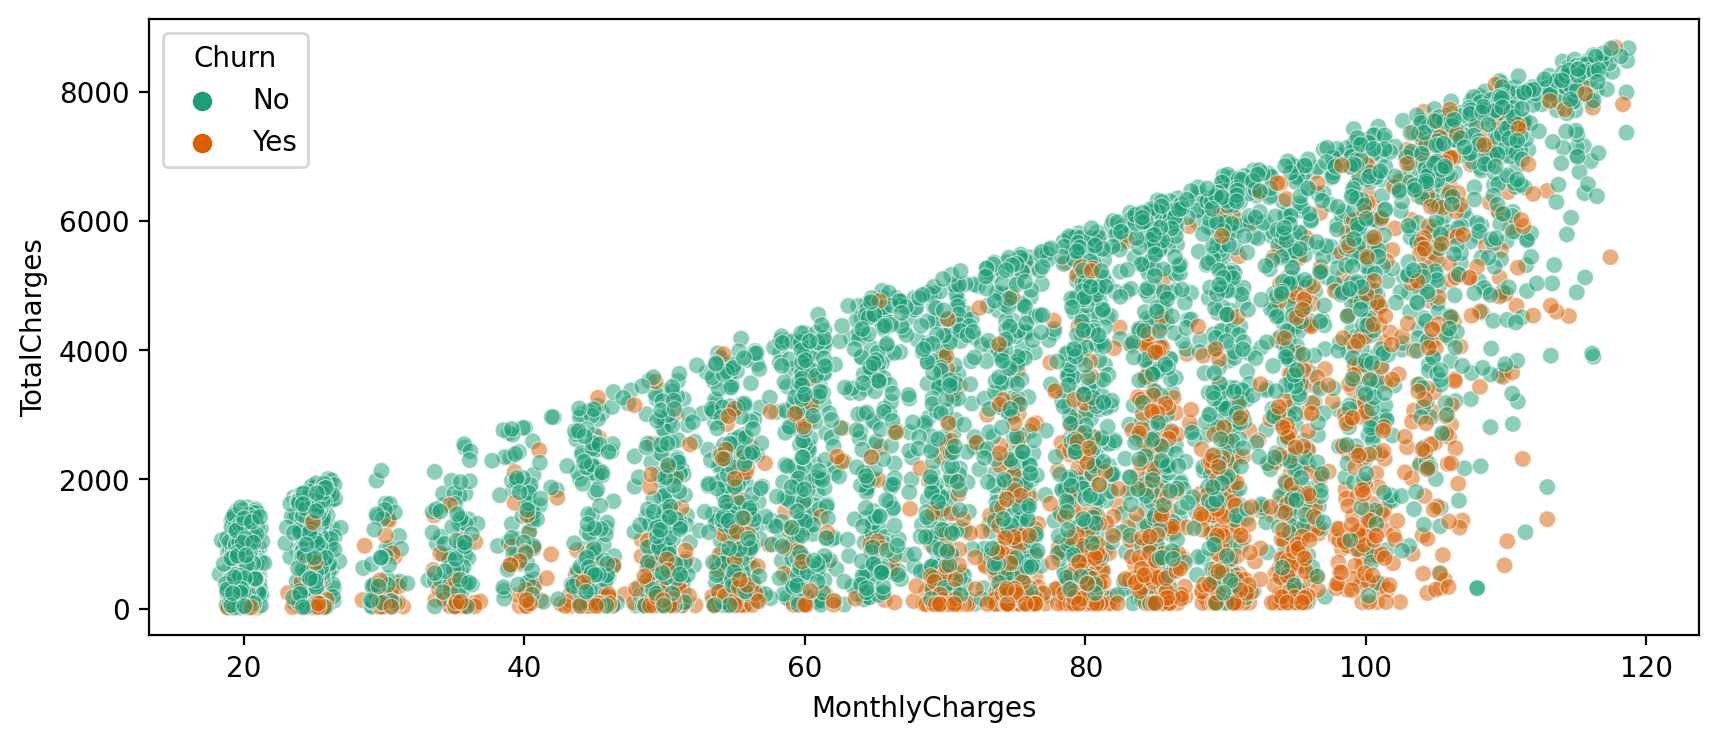

In [147]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", hue="Churn",alpha=0.5,palette="Dark2")

In [148]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort.**

In [157]:
cohort_churn=df.groupby(["tenure", "Churn"])["customerID"].count().unstack()
cohort_churn["rate"]=cohort_churn["Yes"]*100/(cohort_churn["No"]+cohort_churn["Yes"])
cohort_churn["rate"]

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: rate, Length: 72, dtype: float64

In [158]:
pd.DataFrame(cohort_churn["rate"])

rate
tenure           
1       61.990212
2       51.680672
3       47.000000
4       47.159091
5       48.120301
...           ...
68       9.000000
69       8.421053
70       9.243697
71       3.529412
72       1.657459

[72 rows x 1 columns]

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

Text(0.5, 0, 'Tenure, months')

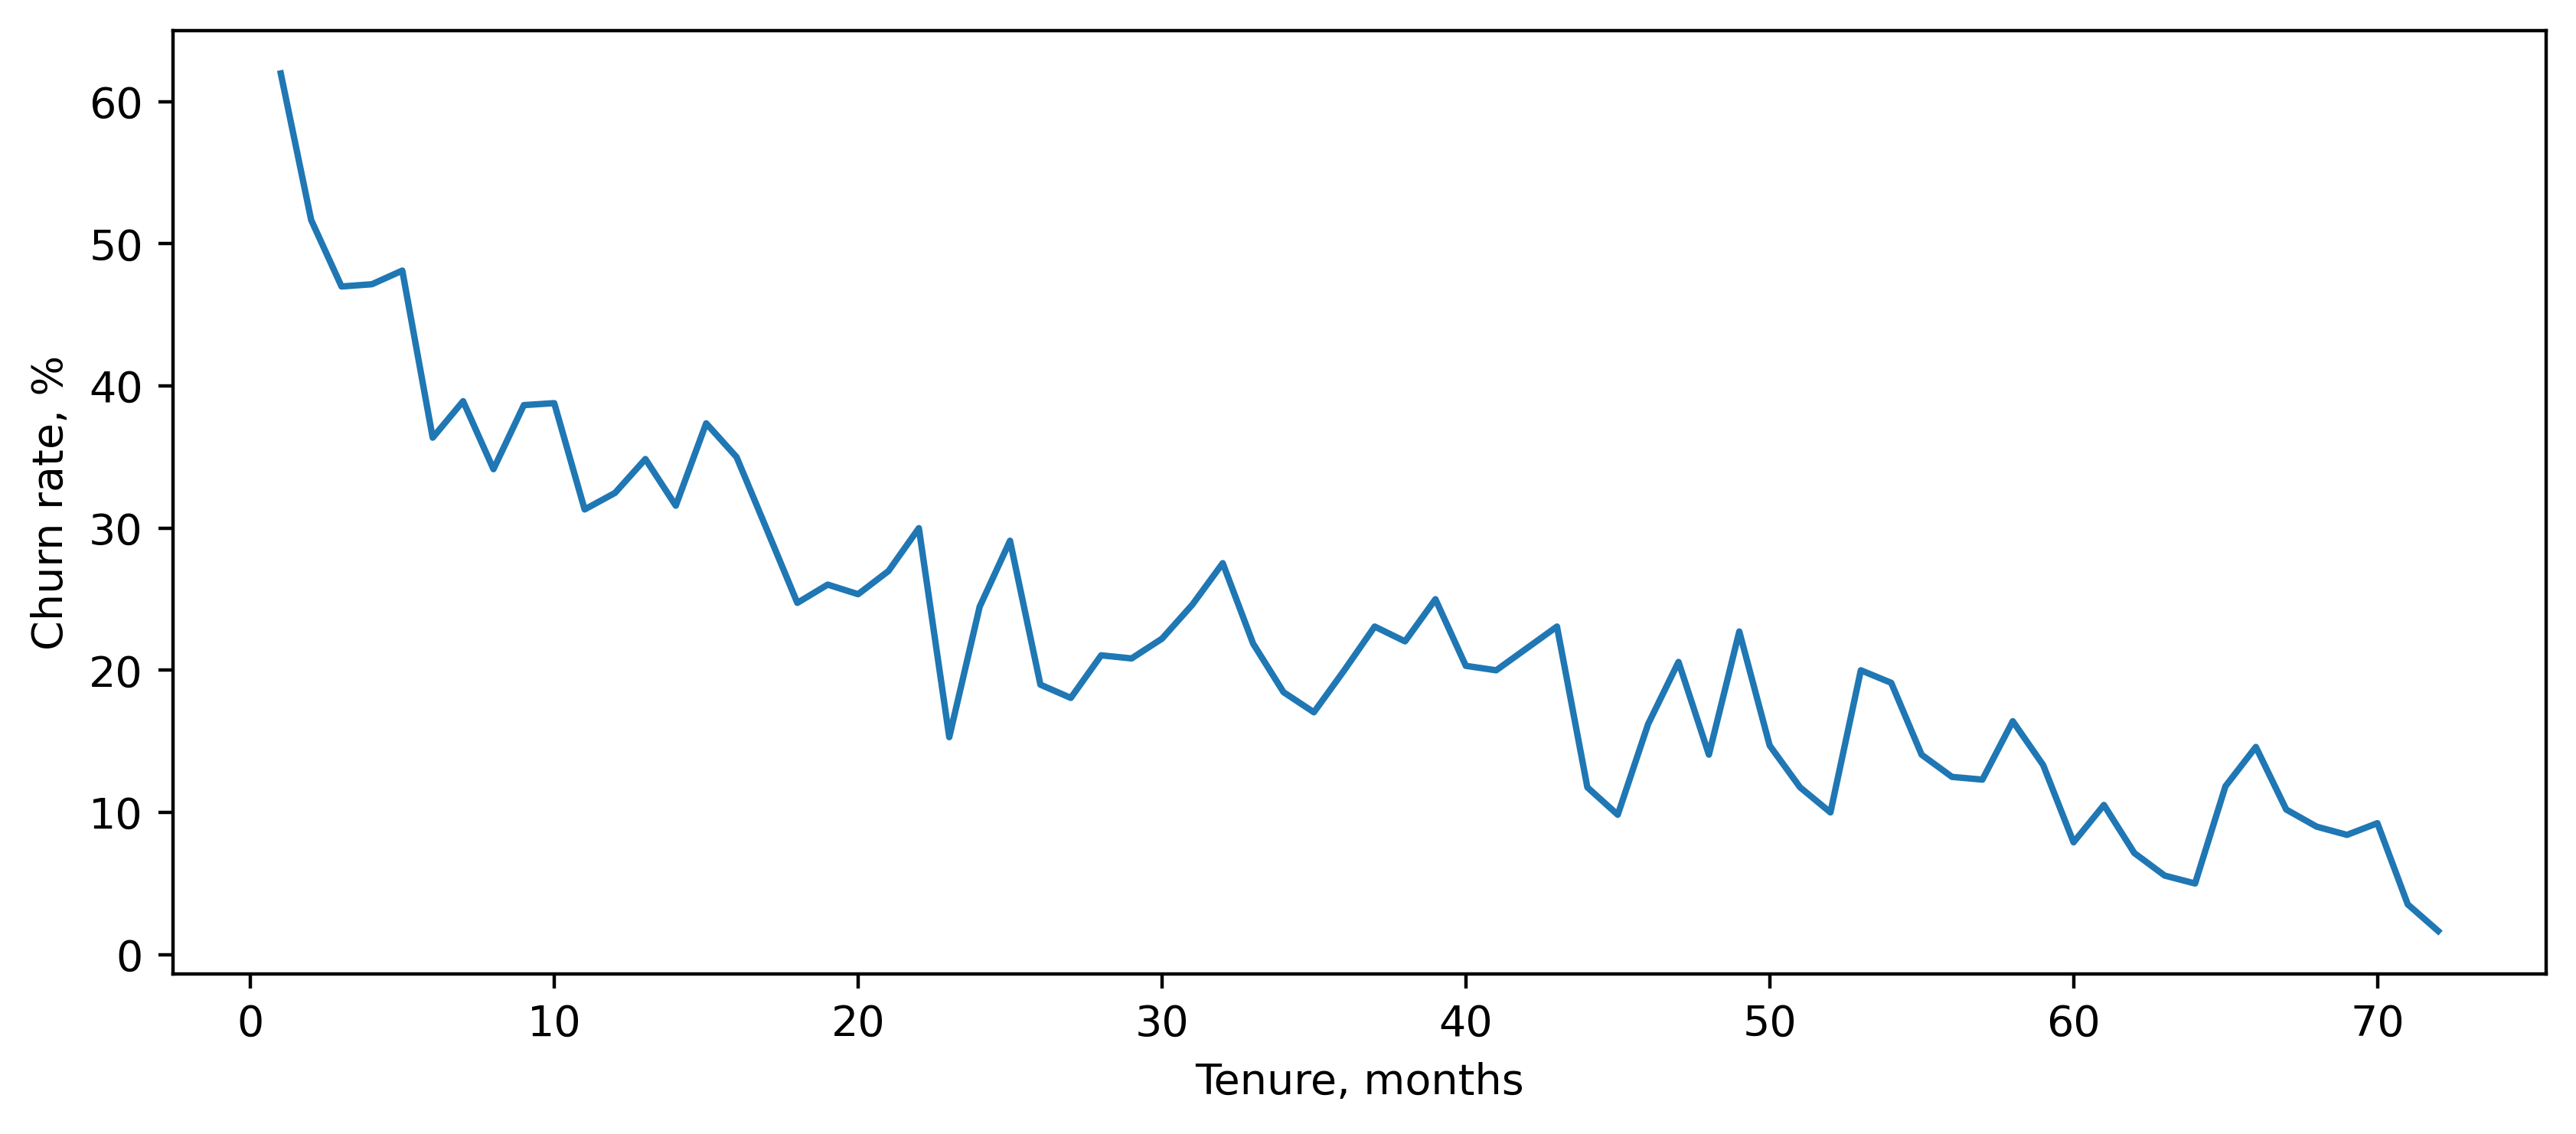

In [163]:
plt.figure(figsize=(10,4), dpi=400)
sns.lineplot(data=pd.DataFrame(cohort_churn["rate"]), x="tenure", y="rate")
plt.ylabel("Churn rate, %")
plt.xlabel("Tenure, months")

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [166]:
group_names=['0-12 Months', '12-24 Months', '24-48 Months', 'Over 48 Months']
bins=[0,12, 24, 48, 100]
df["cat_tenure"]=pd.cut(df.tenure, bins, labels=group_names)

In [167]:
df["cat_tenure"]

0          0-12 Months
1         24-48 Months
2          0-12 Months
3         24-48 Months
4          0-12 Months
             ...      
7027      12-24 Months
7028    Over 48 Months
7029       0-12 Months
7030       0-12 Months
7031    Over 48 Months
Name: cat_tenure, Length: 7032, dtype: category
Categories (4, object): ['0-12 Months' < '12-24 Months' < '24-48 Months' < 'Over 48 Months']

In [274]:
df[["cat_tenure","tenure"]].head(30)

cat_tenure  tenure
0      0-12 Months       1
1     24-48 Months      34
2      0-12 Months       2
3     24-48 Months      45
4      0-12 Months       2
5      0-12 Months       8
6     12-24 Months      22
7      0-12 Months      10
8     24-48 Months      28
9   Over 48 Months      62
10    12-24 Months      13
11    12-24 Months      16
12  Over 48 Months      58
13  Over 48 Months      49
14    24-48 Months      25
15  Over 48 Months      69
16  Over 48 Months      52
17  Over 48 Months      71
18     0-12 Months      10
19    12-24 Months      21
20     0-12 Months       1
21     0-12 Months      12
22     0-12 Months       1
23  Over 48 Months      58
24  Over 48 Months      49
25    24-48 Months      30
26    24-48 Months      47
27     0-12 Months       1
28  Over 48 Months      72
29    12-24 Months      17

**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

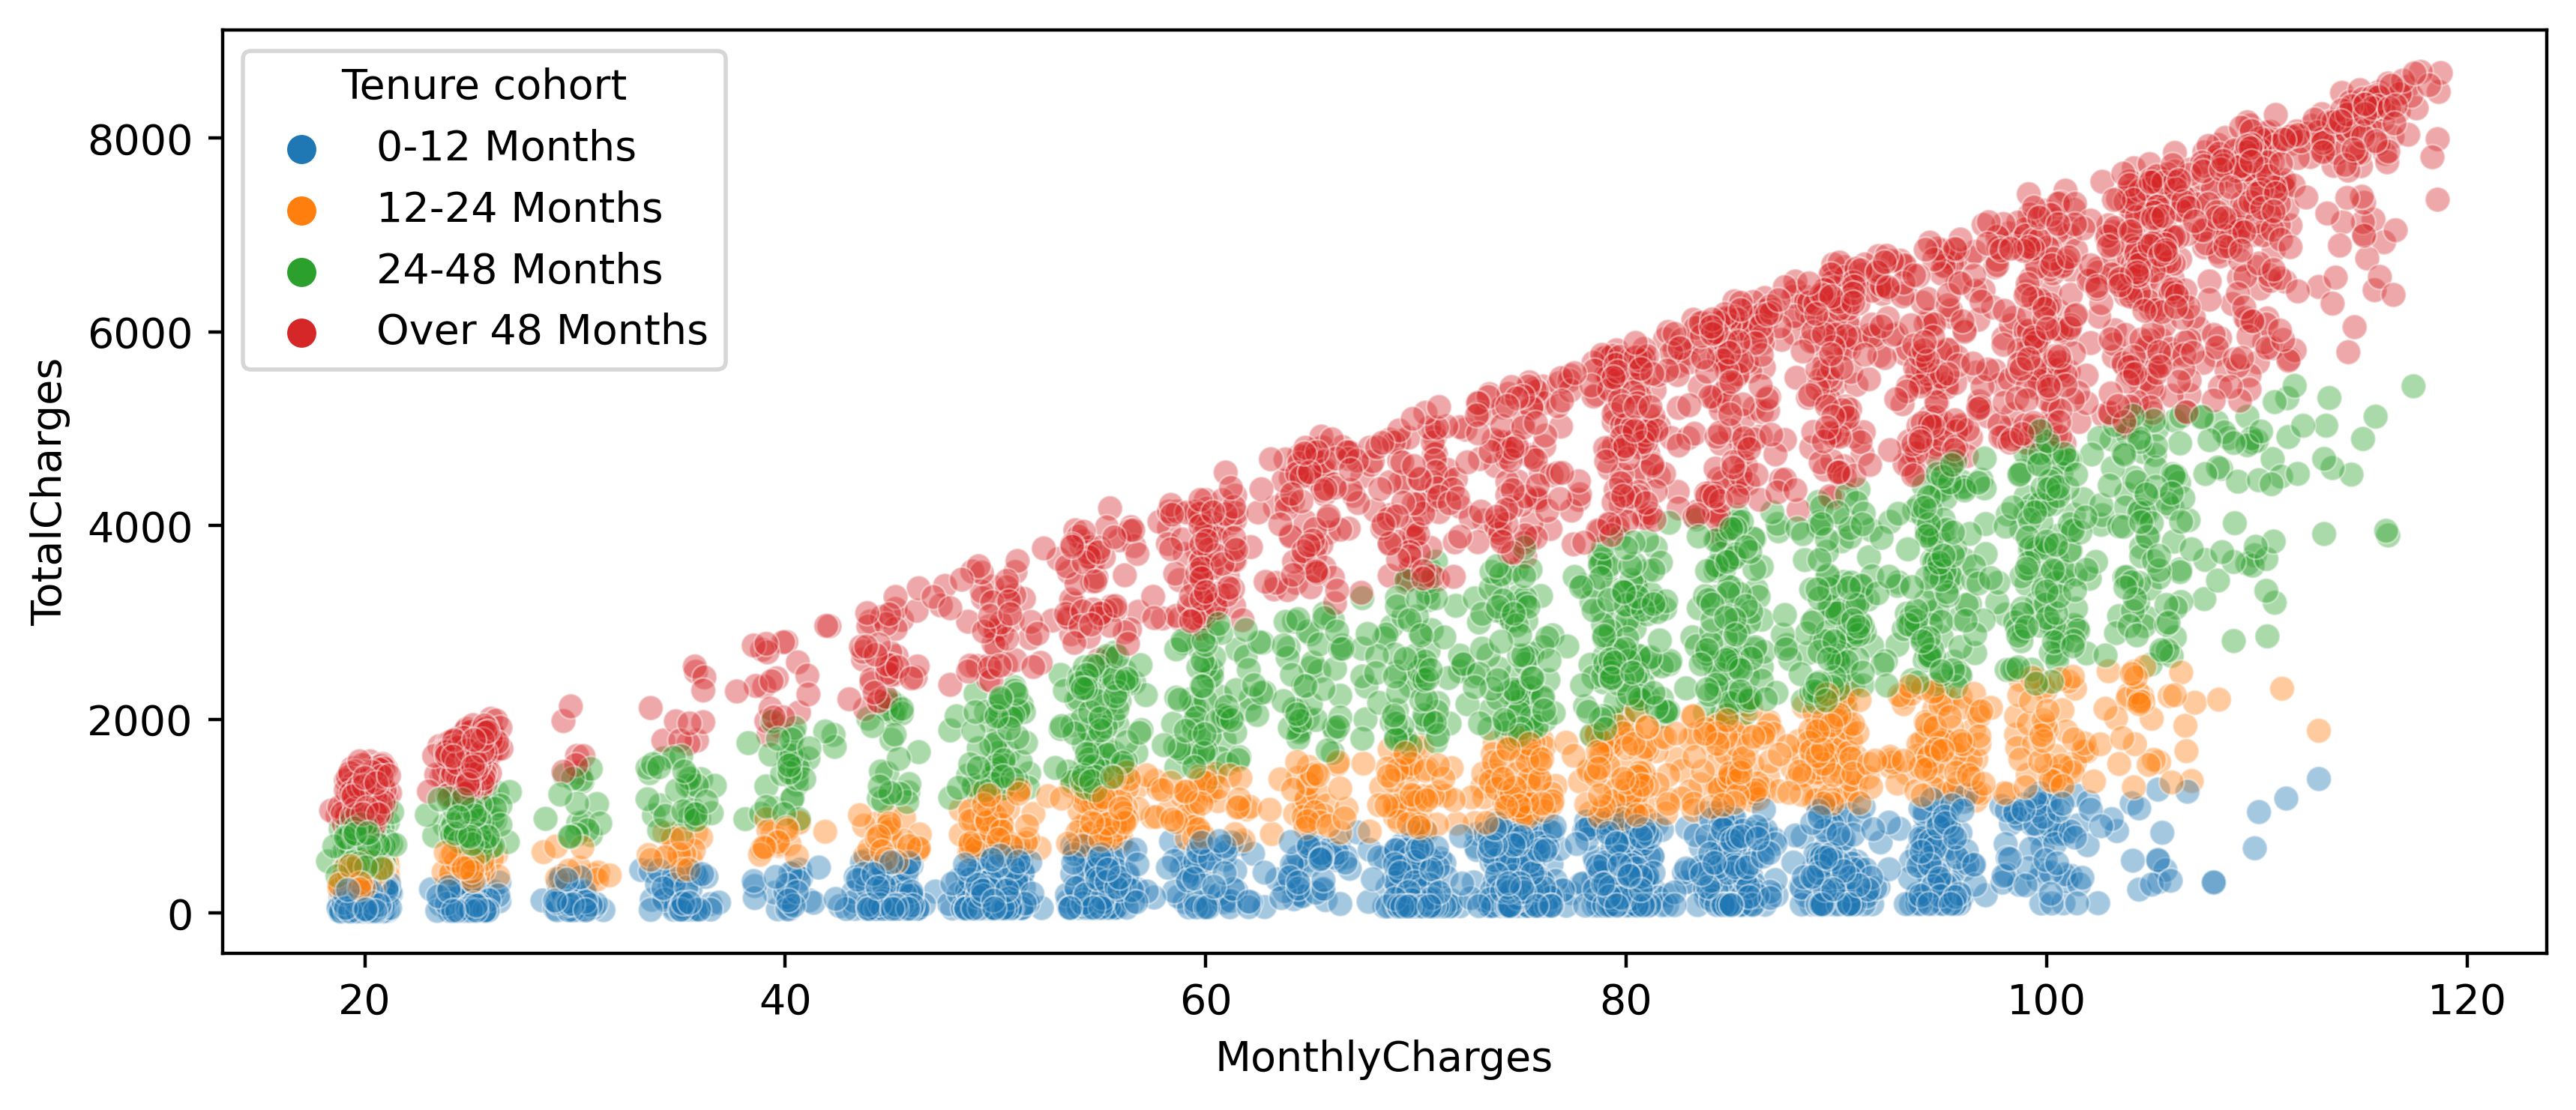

In [270]:
plt.figure(figsize=(10,4), dpi=400)
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", hue="cat_tenure", alpha=0.4)
plt.legend(title="Tenure cohort");

**TASK: Create a count plot showing the churn count per cohort.**

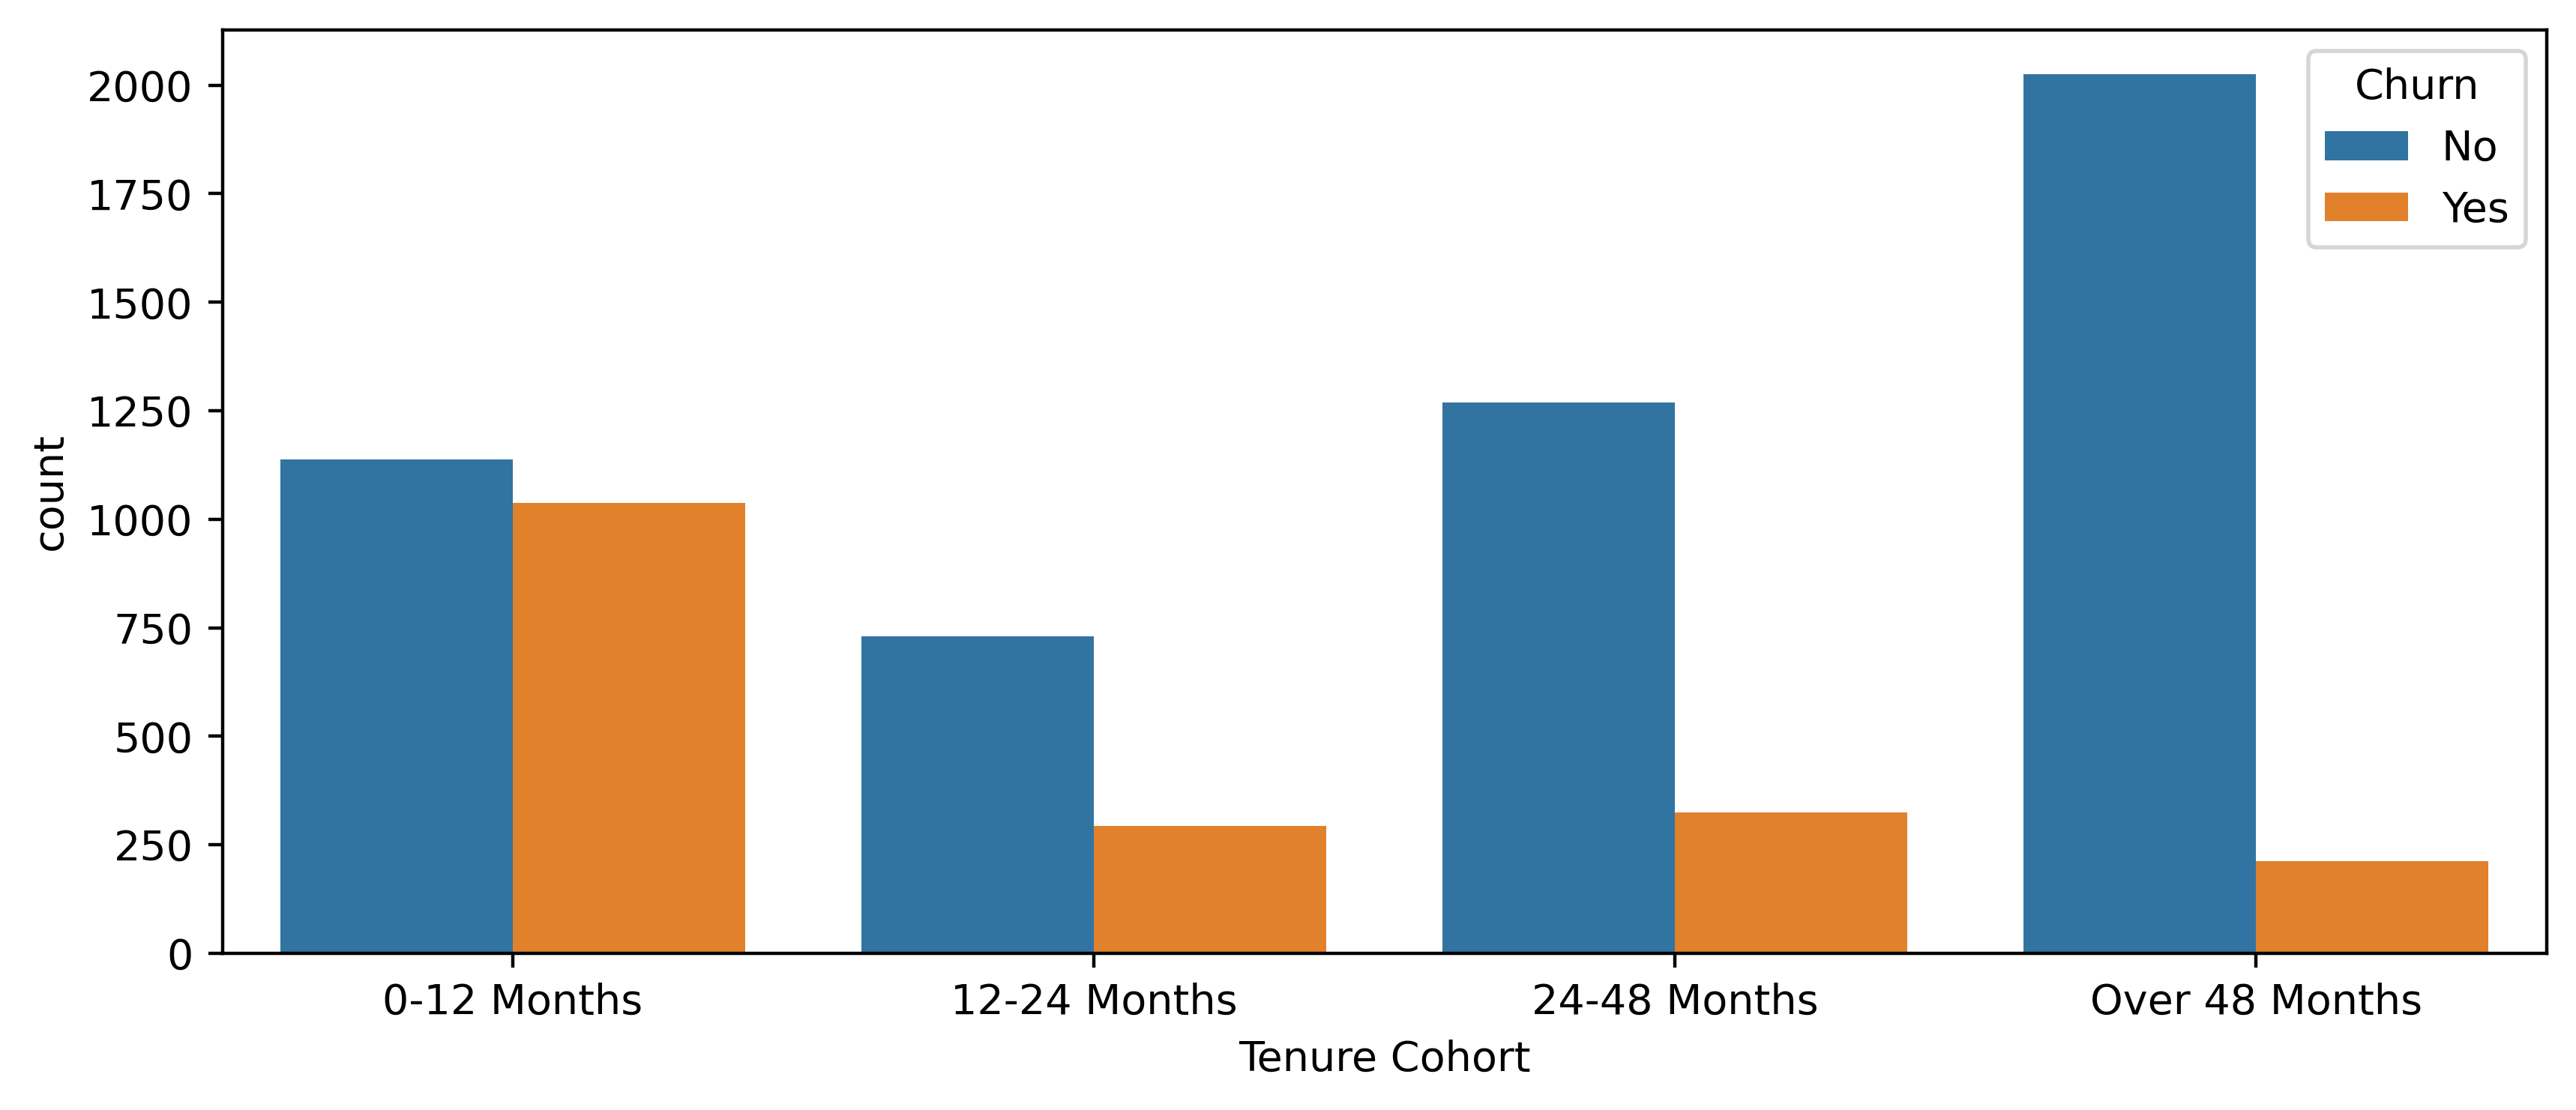

In [269]:
plt.figure(figsize=(10,4), dpi=400)
sns.countplot(data=df, x="cat_tenure", hue="Churn")
plt.xlabel("Tenure Cohort");

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

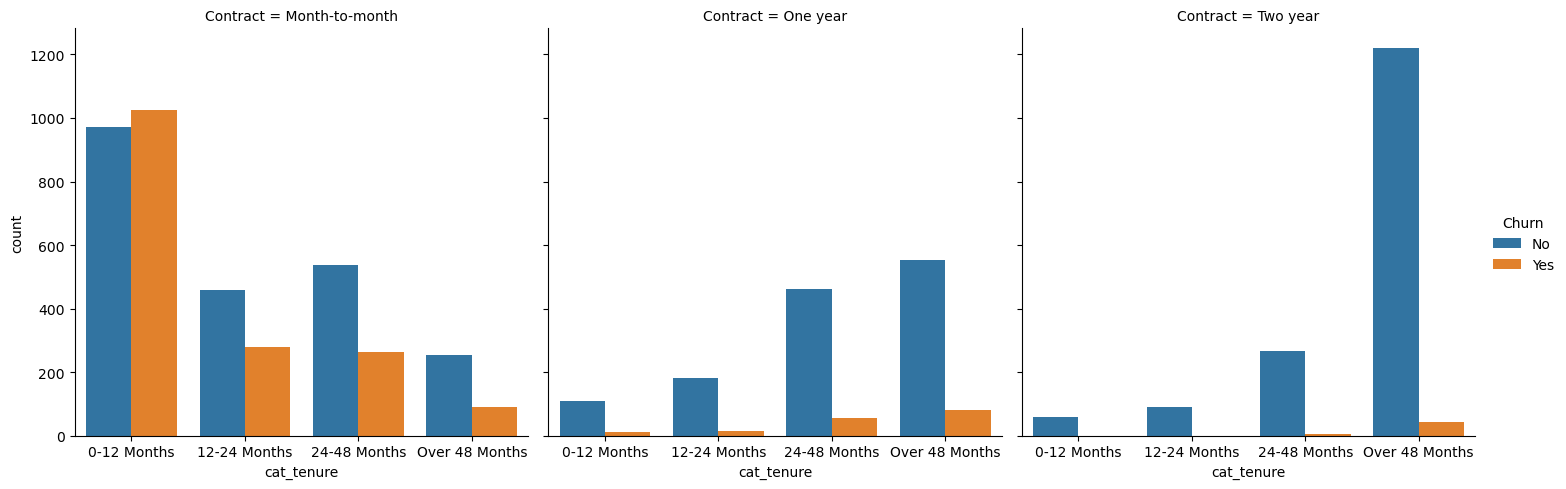

In [268]:
sns.catplot(data=df, x="cat_tenure", col="Contract", kind="count", hue="Churn");

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. 

## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [211]:
#CODE HERE
y=df["Churn"]
X=df.drop(["customerID", "Churn"], axis=1)

In [214]:
X=pd.get_dummies(X, drop_first=True);

In [215]:
X

tenure  MonthlyCharges  TotalCharges  gender_Male  SeniorCitizen_1  \
0          1           29.85         29.85            0                0   
1         34           56.95       1889.50            1                0   
2          2           53.85        108.15            1                0   
3         45           42.30       1840.75            1                0   
4          2           70.70        151.65            0                0   
...      ...             ...           ...          ...              ...   
7027      24           84.80       1990.50            1                0   
7028      72          103.20       7362.90            0                0   
7029      11           29.60        346.45            0                0   
7030       4           74.40        306.60            1                1   
7031      66          105.65       6844.50            1                0   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0               1               0                 0   
1               0               0                 1   
2               0               0                 1   
3               0               0                 0   
4               0               0                 1   
...           ...             ...               ...   
7027            1               1                 1   
7028            1               1                 1   
7029            1               1                 0   
7030            1               0                 1   
7031            0               0                 1   

      MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                                  1                  0  ...   
1                                  0                  0  ...   
2                                  0                  0  ...   
3                                  1                  0  ...   
4                                  0                  0  ...   
...                              ...                ...  ...   
7027                               0                  1  ...   
7028                               0                  1  ...   
7029                               1                  0  ...   
7030                               0                  1  ...   
7031                               0                  0  ...   

      StreamingMovies_Yes  Contract_One year  Contract_Two year  \
0                       0                  0                  0   
1                       0                  1                  0   
2                       0                  0                  0   
3                       0                  1                  0   
4                       0                  0                  0   
...                   ...                ...                ...   
7027                    1                  1                  0   
7028                    1                  1                  0   
7029                    0                  0                  0   
7030                    0                  0                  0   
7031                    1                  0                  1   

      PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  \
0                        1                                      0   
1                        0                                      0   
2                        1                                      0   
3                        0                                      0   
4                        1                                      0   
...                    ...                                    ...   
7027                     1                                      0   
7028                     1                                      1   
7029                     1                                      0   
7030                     1                                      0   
7031                     1                                      0   

      PaymentMethod_Electroni

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [216]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Decision Tree Perfomance. Complete the following tasks:**


In [275]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tree=DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_depth': [2, 6, 10, 20, 40]
}

# Instantiate the decision tree classifier
dtc = DecisionTreeClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 640 candidates, totalling 3200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 6, 10, 20, 40],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'splitter': ['best', 'random']},
             verbose=1)

In [276]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=10,
                       splitter='random')

In [278]:
y_pred=grid_search.predict(X_test)

In [279]:
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

          No       0.87      0.88      0.88       556
         Yes       0.53      0.53      0.53       148

    accuracy                           0.80       704
   macro avg       0.70      0.70      0.70       704
weighted avg       0.80      0.80      0.80       704



### Simple tree

In [241]:
dtree=DecisionTreeClassifier(max_depth=6)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [242]:
tree_preds=dtree.predict(X_test)
print(classification_report(y_test, tree_preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



C:\Users\murad\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


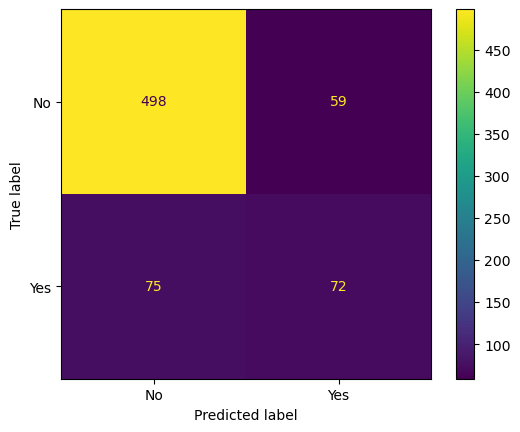

In [244]:
plot_confusion_matrix(dtree, X_test, y_test);

In [245]:
dtree.feature_importances_.tolist()

[0.4239140724198361,
 0.04611481267768148,
 0.06231285267980379,
 0.0012369696393788748,
 0.012680498256856352,
 0.0,
 0.0,
 0.0,
 0.007851578315941405,
 0.012431913238983435,
 0.3140601645382755,
 0.0,
 0.02628952174460581,
 0.008375848899148618,
 0.0,
 0.005341323629468507,
 0.0,
 0.0,
 0.0,
 0.007867522017481891,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01002117698578571,
 0.027065429409644477,
 0.0,
 0.0,
 0.03443631554710812,
 0.0,
 0.0,
 0.0,
 0.0]

In [246]:
feat_importance=pd.DataFrame({"Feature":X.columns, "Importance":dtree.feature_importances_.tolist()})

In [247]:
feat_importance=feat_importance.sort_values(by="Importance", ascending=True)

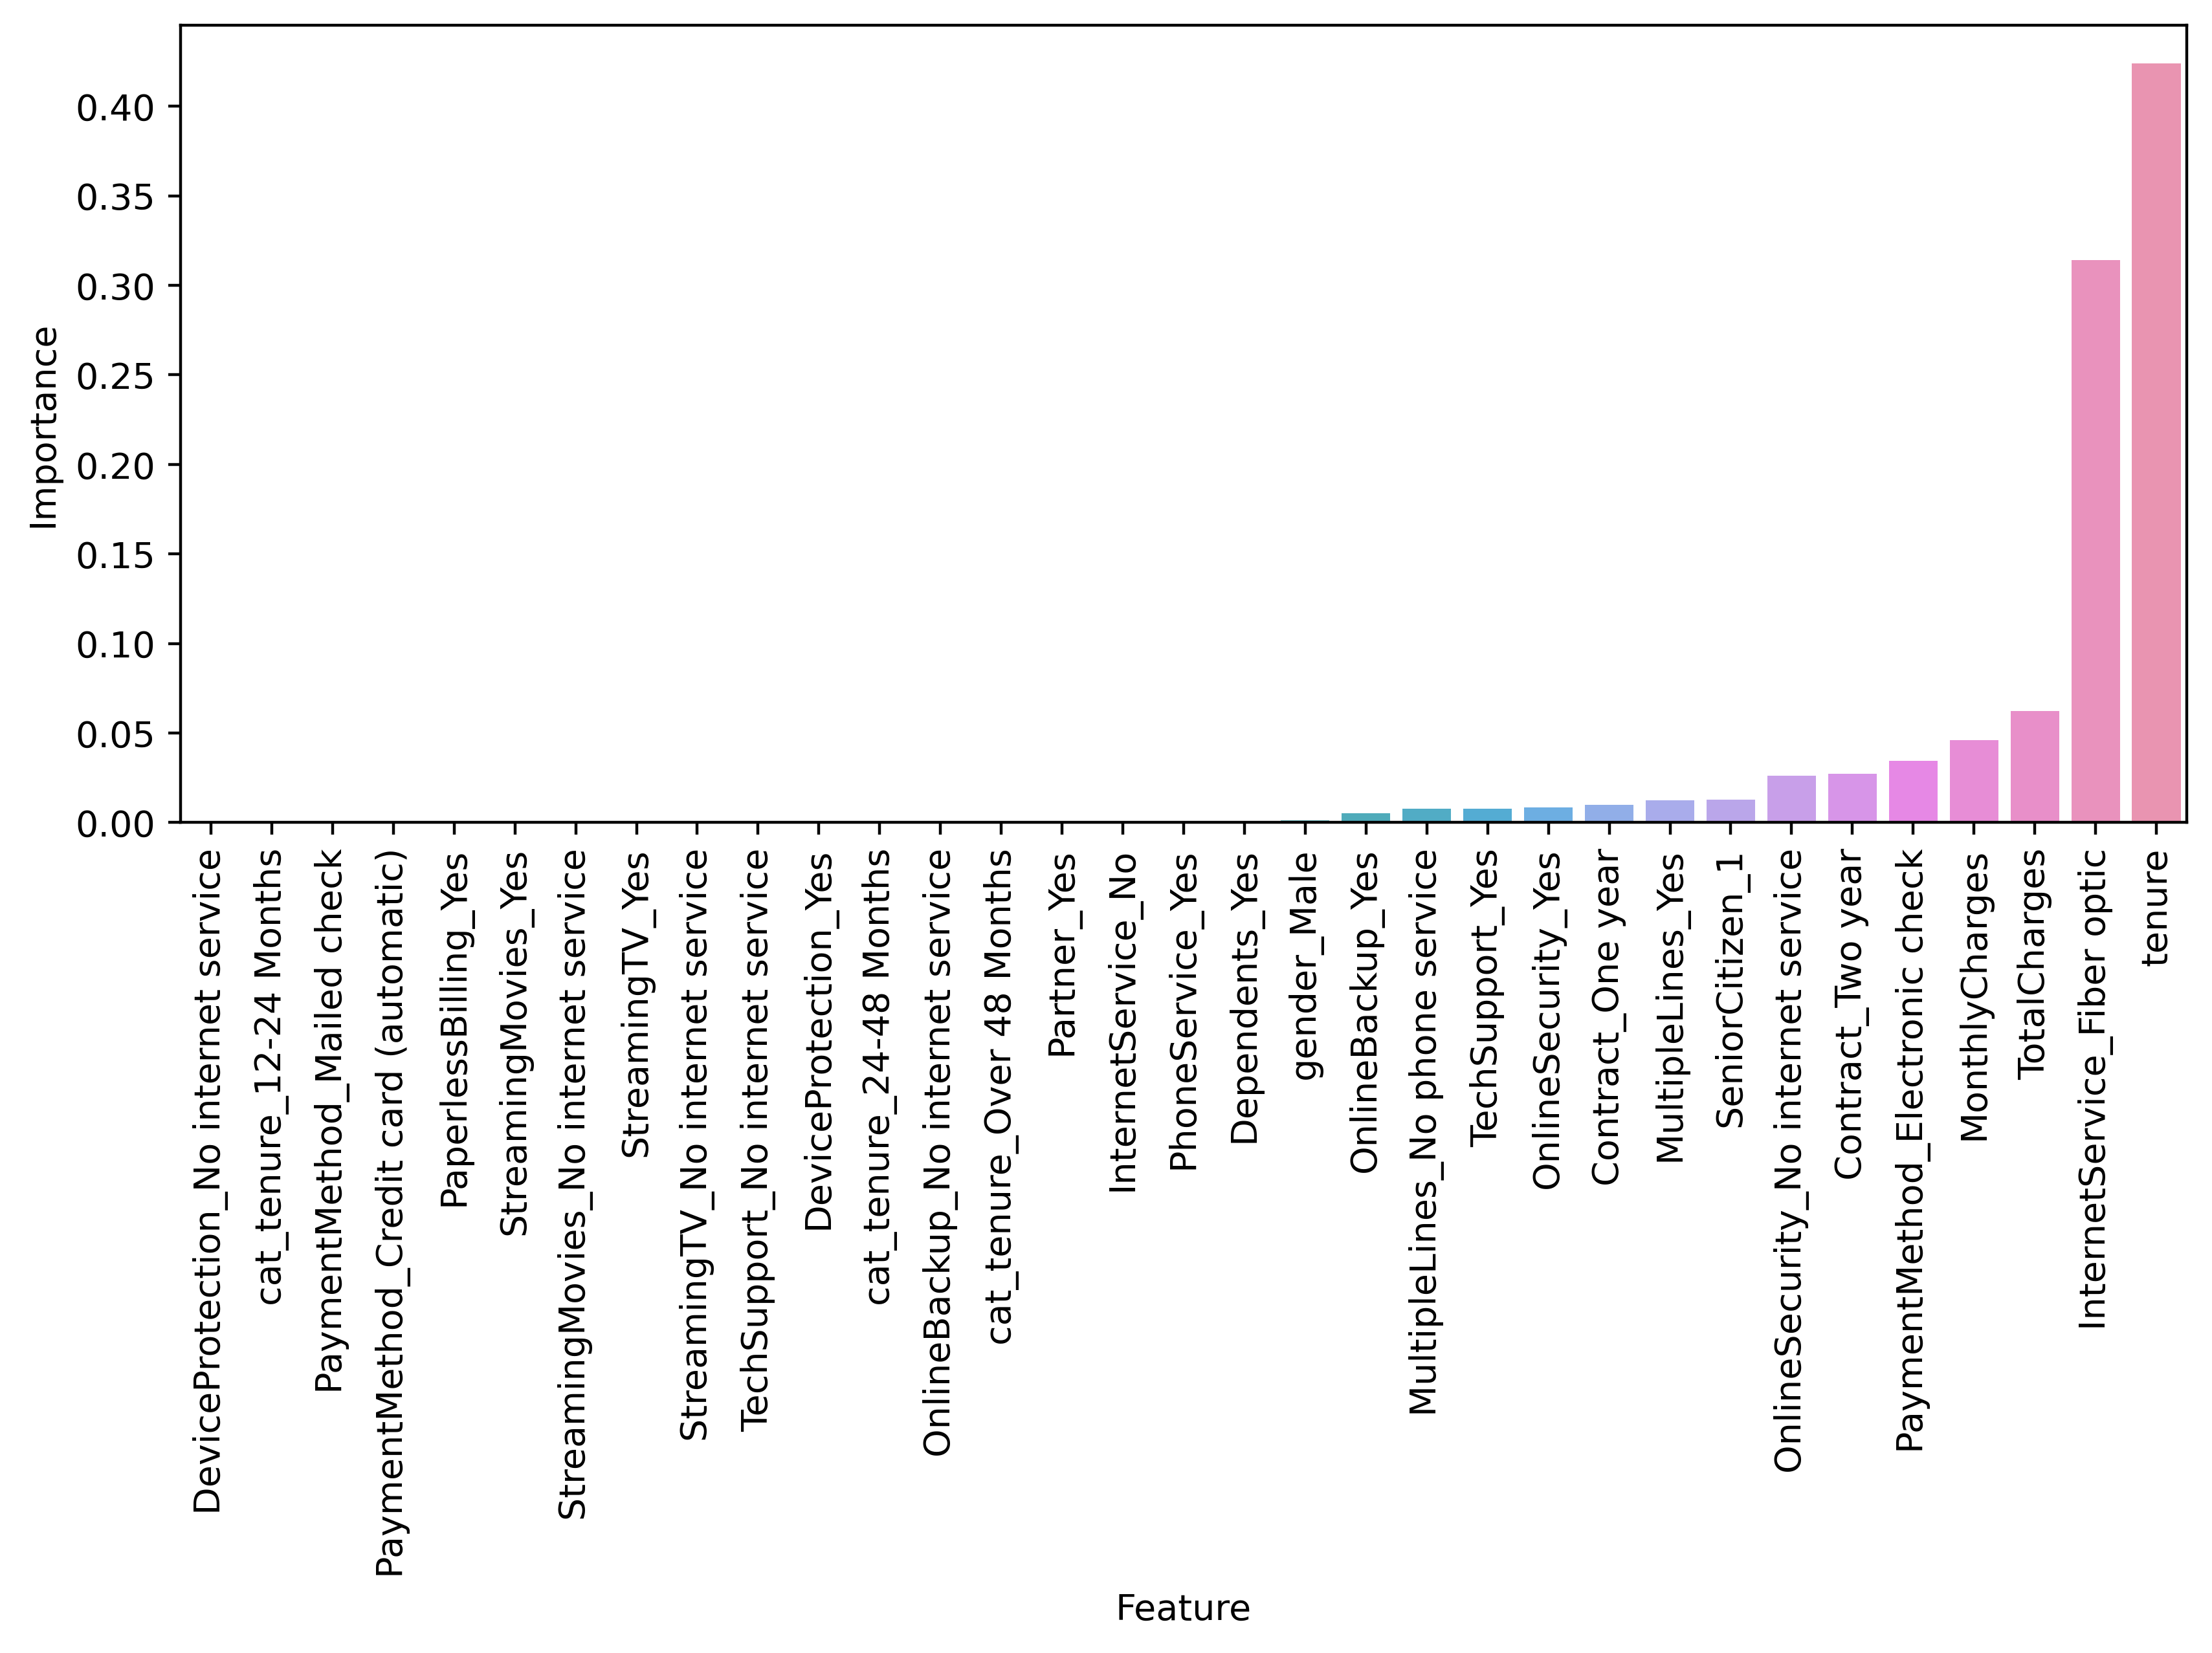

In [248]:
plt.figure(figsize=(10,4), dpi=400)
sns.barplot(data=feat_importance, x="Feature", y="Importance")
plt.xticks(rotation=90);

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [262]:
from sklearn.ensemble import RandomForestClassifier
rndm=RandomForestClassifier(n_estimators=100)
rndm.fit(X_train, y_train)
r_preds=rndm.predict(X_test)

In [263]:
print(classification_report(r_preds,y_test))

              precision    recall  f1-score   support

          No       0.89      0.86      0.87       574
         Yes       0.45      0.51      0.48       130

    accuracy                           0.79       704
   macro avg       0.67      0.68      0.67       704
weighted avg       0.80      0.79      0.80       704



C:\Users\murad\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


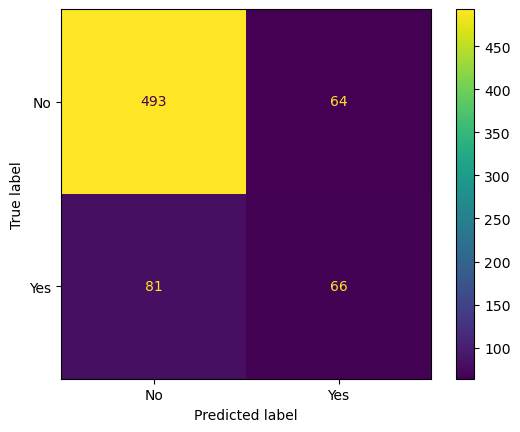

In [264]:
plot_confusion_matrix(rndm, X_test, y_test);

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [265]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(X_train,y_train)
a_preds=ada.predict(X_test)

In [266]:
print(classification_report(a_preds,y_test))

              precision    recall  f1-score   support

          No       0.92      0.88      0.90       580
         Yes       0.53      0.63      0.58       124

    accuracy                           0.84       704
   macro avg       0.72      0.76      0.74       704
weighted avg       0.85      0.84      0.84       704



C:\Users\murad\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


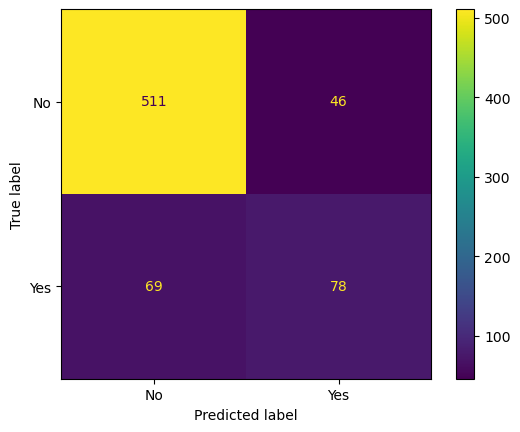

In [267]:
plot_confusion_matrix(ada,X_test, y_test)

**TASK: Analyze your results, which model performed best for you?**

With base models, we got best performance from an AdaBoostClassifier. In our case, since it more important to reduce the rate of False negatives, or in other words, Recall, we can also try to use GridSearchCV to find optimal parameters that could improve the results of report.